## __Problem Statement:__
Create a detailed report on the monthly weather data by performing text manipulation, data sorting, and visualization to analyze temperature and precipitation trends.

__Data:__
The dataset contains daily observations of temperature and precipitation over a month.Given : Weather_data.csv

## __Steps to Perform:__

1. Textual manipulation
- Convert 'Day' to a string format with appropriate suffixes (1st, 2nd, 3rd, and so on)
- Classify 'Temperature' into categories (Low, Medium, High) based on predefined thresholds
- Determine if 'Precipitation' falls under 'Light', 'Moderate', or 'Heavy' rainfall

2. Iteration and data aggregation
- Iterate over the DataFrame to calculate weekly averages of temperature and precipitation
- Summarize findings in a new DataFrame

3. Sorting
- Sort the DataFrame by 'Temperature' and 'Precipitation' in ascending and descending order
- Sort the DataFrame by the day of the month

4. Plotting
- Create a line plot for temperature trends
- Create a bar plot to compare precipitation levels across the month

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:


# Load the dataset
weather_data = pd.read_csv('Weather_data.csv')


In [6]:

# Convert 'Day' column to string format with appropriate suffixes
def add_day_suffix(day):
    if 11 <= day <= 13:
        return f"{day}th"
    suffixes = {1: 'st', 2: 'nd', 3: 'rd'}
    return f"{day}{suffixes.get(day % 10, 'th')}"

weather_data['Day'] = weather_data['Day'].apply(add_day_suffix)


In [7]:

# Classify 'Temperature' into categories
def categorize_temperature(temp):
    if temp < 10:
        return 'Low'
    elif 10 <= temp <= 25:
        return 'Medium'
    else:
        return 'High'

weather_data['Temperature_Category'] = weather_data['Temperature'].apply(categorize_temperature)


In [8]:

# Classify 'Precipitation' into categories
def categorize_precipitation(precip):
    if precip == 0:
        return 'None'
    elif precip < 5:
        return 'Light'
    elif precip < 15:
        return 'Moderate'
    else:
        return 'Heavy'

weather_data['Precipitation_Category'] = weather_data['Precipitation'].apply(categorize_precipitation)


In [9]:

# Calculate weekly averages of temperature and precipitation
weather_data['Week'] = (weather_data.index // 7) + 1
weekly_summary = weather_data.groupby('Week').agg({'Temperature': 'mean', 'Precipitation': 'mean'}).reset_index()


In [10]:

# Sorting
sorted_by_temp = weather_data.sort_values(by='Temperature', ascending=True)
sorted_by_precip = weather_data.sort_values(by='Precipitation', ascending=False)
sorted_by_day = weather_data.sort_values(by='Day')


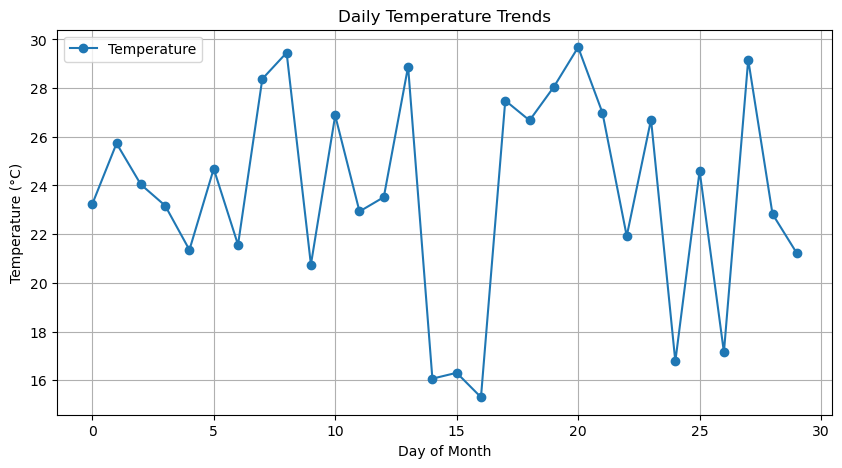

In [11]:

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(weather_data.index, weather_data['Temperature'], marker='o', linestyle='-', label='Temperature')
plt.xlabel('Day of Month')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature Trends')
plt.legend()
plt.grid(True)
plt.show()


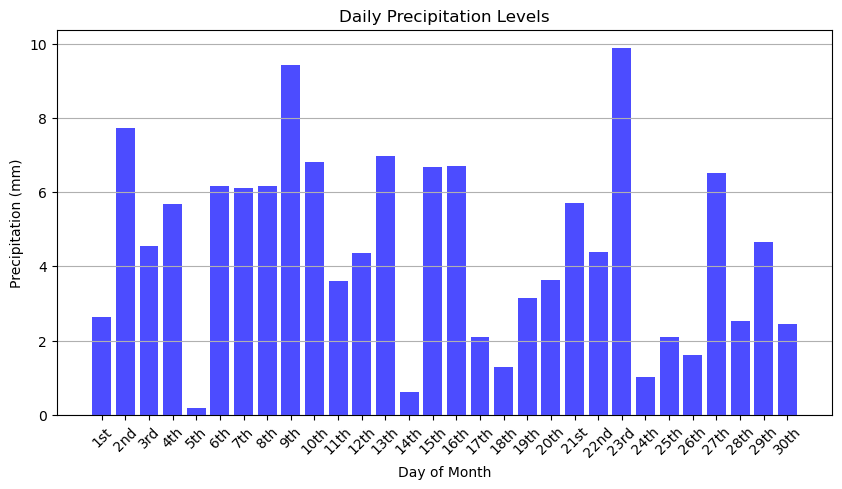

In [12]:

plt.figure(figsize=(10, 5))
plt.bar(weather_data['Day'], weather_data['Precipitation'], color='blue', alpha=0.7)
plt.xlabel('Day of Month')
plt.ylabel('Precipitation (mm)')
plt.title('Daily Precipitation Levels')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [14]:

# Display a preview of the processed data
print(weather_data.head())

# Optionally, save the processed data to a CSV file for further analysis
weather_data.to_csv("processed_weather_data.csv", index=False)



   Day  Temperature  Precipitation Temperature_Category  \
0  1st    23.232203       2.645556               Medium   
1  2nd    25.727840       7.742337                 High   
2  3rd    24.041451       4.561503               Medium   
3  4th    23.173248       5.684339               Medium   
4  5th    21.354822       0.187898               Medium   

  Precipitation_Category  Week  
0                  Light     1  
1               Moderate     1  
2                  Light     1  
3               Moderate     1  
4                  Light     1  


In [ ]:

weather_data['Day'] = weather_data['Day'].apply(add_day_suffix)

# Classify 'Temperature' into categories
def categorize_temperature(temp):
    if temp < 10:
        return 'Low'
    elif 10 <= temp <= 25:
        return 'Medium'
    else:
        return 'High'

weather_data['Temperature_Category'] = weather_data['Temperature'].apply(categorize_temperature)


In [ ]:

# Classify 'Precipitation' into categories
def categorize_precipitation(precip):
    if precip == 0:
        return 'None'
    elif precip < 5:
        return 'Light'
    elif precip < 15:
        return 'Moderate'
    else:
        return 'Heavy'

weather_data['Precipitation_Category'] = weather_data['Precipitation'].apply(categorize_precipitation)


In [ ]:

# Calculate weekly averages of temperature and precipitation
weather_data['Week'] = (weather_data.index // 7) + 1
weekly_summary = weather_data.groupby('Week').agg({'Temperature': 'mean', 'Precipitation': 'mean'}).reset_index()


In [ ]:

# Sorting
sorted_by_temp = weather_data.sort_values(by='Temperature', ascending=True)
sorted_by_precip = weather_data.sort_values(by='Precipitation', ascending=False)
sorted_by_day = weather_data.sort_values(by='Day')


In [ ]:

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(weather_data.index, weather_data['Temperature'], marker='o', linestyle='-', label='Temperature')
plt.xlabel('Day of Month')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature Trends')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

plt.figure(figsize=(10, 5))
plt.bar(weather_data['Day'], weather_data['Precipitation'], color='blue', alpha=0.7)
plt.xlabel('Day of Month')
plt.ylabel('Precipitation (mm)')
plt.title('Daily Precipitation Levels')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:

# Display the processed DataFrame
import ace_tools as tools
tools.display_dataframe_to_user(name="Processed Weather Data", dataframe=weather_data)
